# Visualisation of blends missed by BH

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mimage
import seaborn as sns

## Import dataset (errors for sigma_noise=0)

In [2]:
errors0 = pd.read_csv('/Users/alacan/Documents/Cosmostat/Codes/BlendHunter/bh_missed_blends0.csv',  index_col=0)

In [3]:
## Create dataset of separated objects (distance>20)
dist= errors0.apply(lambda x: True if x['Distance'] > 20.0 else False , axis=1)
sep_objects = pd.merge(pd.DataFrame(dist[dist==True]), errors0, how='inner', left_index=True, right_index=True, sort=True, copy=True, indicator=False)
## Create dataset of close objects (distance<20)
mid= errors0.apply(lambda x: True if 6.0 < x['Distance'] < 20.0 else False , axis=1)
cls= errors0.apply(lambda x: True if x['Distance'] <= 6.0 else False , axis=1)
close_objects = pd.merge(pd.DataFrame(mid[mid==True]), errors0, how='inner', left_index=True, right_index=True, sort=True, copy=True, indicator=False)
overlaps_objects = pd.merge(pd.DataFrame(cls[cls==True]), errors0, how='inner', left_index=True, right_index=True, sort=True, copy=True, indicator=False)

## Import blended test images in dict (for sigma_noise=0)

In [4]:
path = "/Users/alacan/Documents/Cosmostat/Codes/BlendHunter/bh/BlendHunterData/test/test/image_"

blends_dict = dict()
for i in range(72000, 76000):
    blends_dict.update({str(i) : mimage.imread(path + str(i) + ".png")})

print('There are '+str(len(blends_dict))+' test images in the dictionary.')

There are 4000 test images in the dictionary.


## Visualize missed blends on separated objects ( $Distance > 20.0$ )

We have roughly 20 images (5% of images) where the second object is clearly visible. The issue is that it's usually right at the border of the vignette.

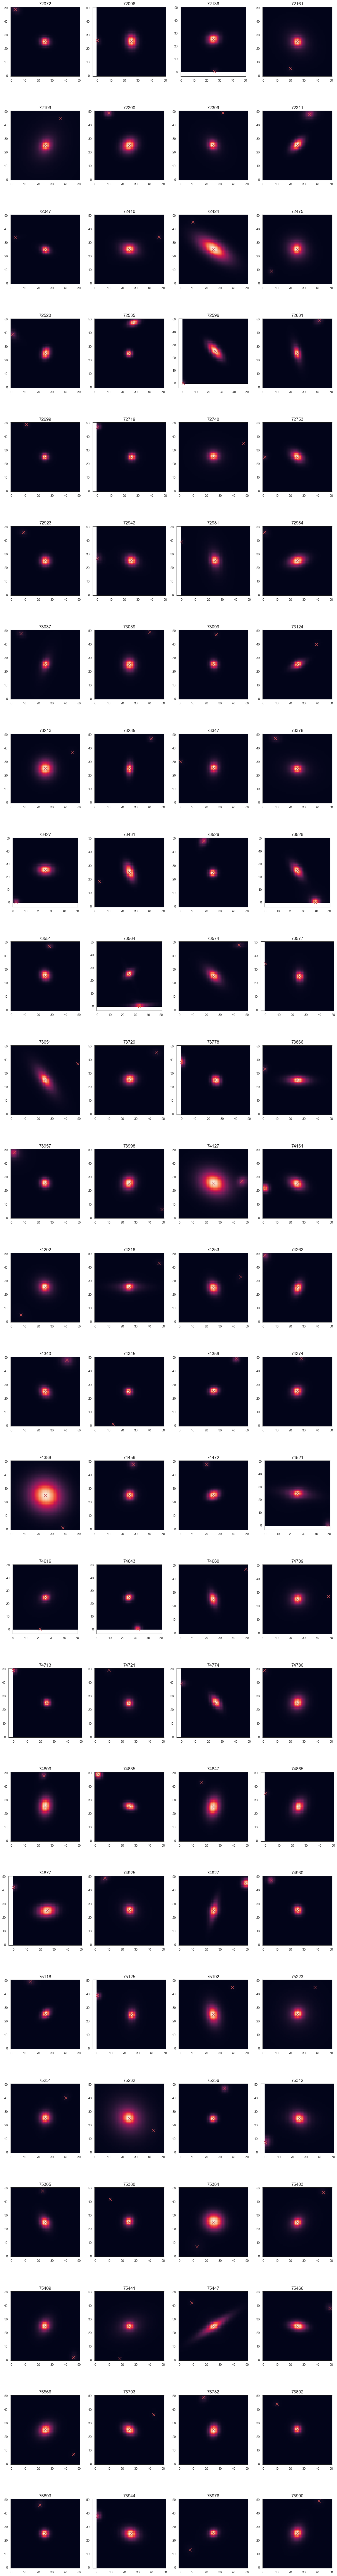

In [5]:
#Seaborn theme
sns.set(context='notebook', style='white', palette='deep')
fig, axs = plt.subplots(25,4, figsize=(20, 160), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.1)

axs = axs.ravel()
for key in blends_dict:
    for i in range(len(sep_objects)):
        if key == str(sep_objects.iloc[i , 8]):
            axs[i].imshow(blends_dict[key], origin = 'lower') #display images
            axs[i].scatter(25,25,color='r', marker ='x', s =90) #adding the X mark
            axs[i].scatter(25 + sep_objects.iloc[i,5], 25 + sep_objects.iloc[i,6], color='r', marker ='x', s =90) #adding the X mark
            axs[i].set_title(key, fontsize=15)
    

plt.show()

## Visualize missed blends on close objects ( $ 20.0 < Distance < 6.0$ )

We have mostly very faint secondary objects that the network doesn't perceive. 

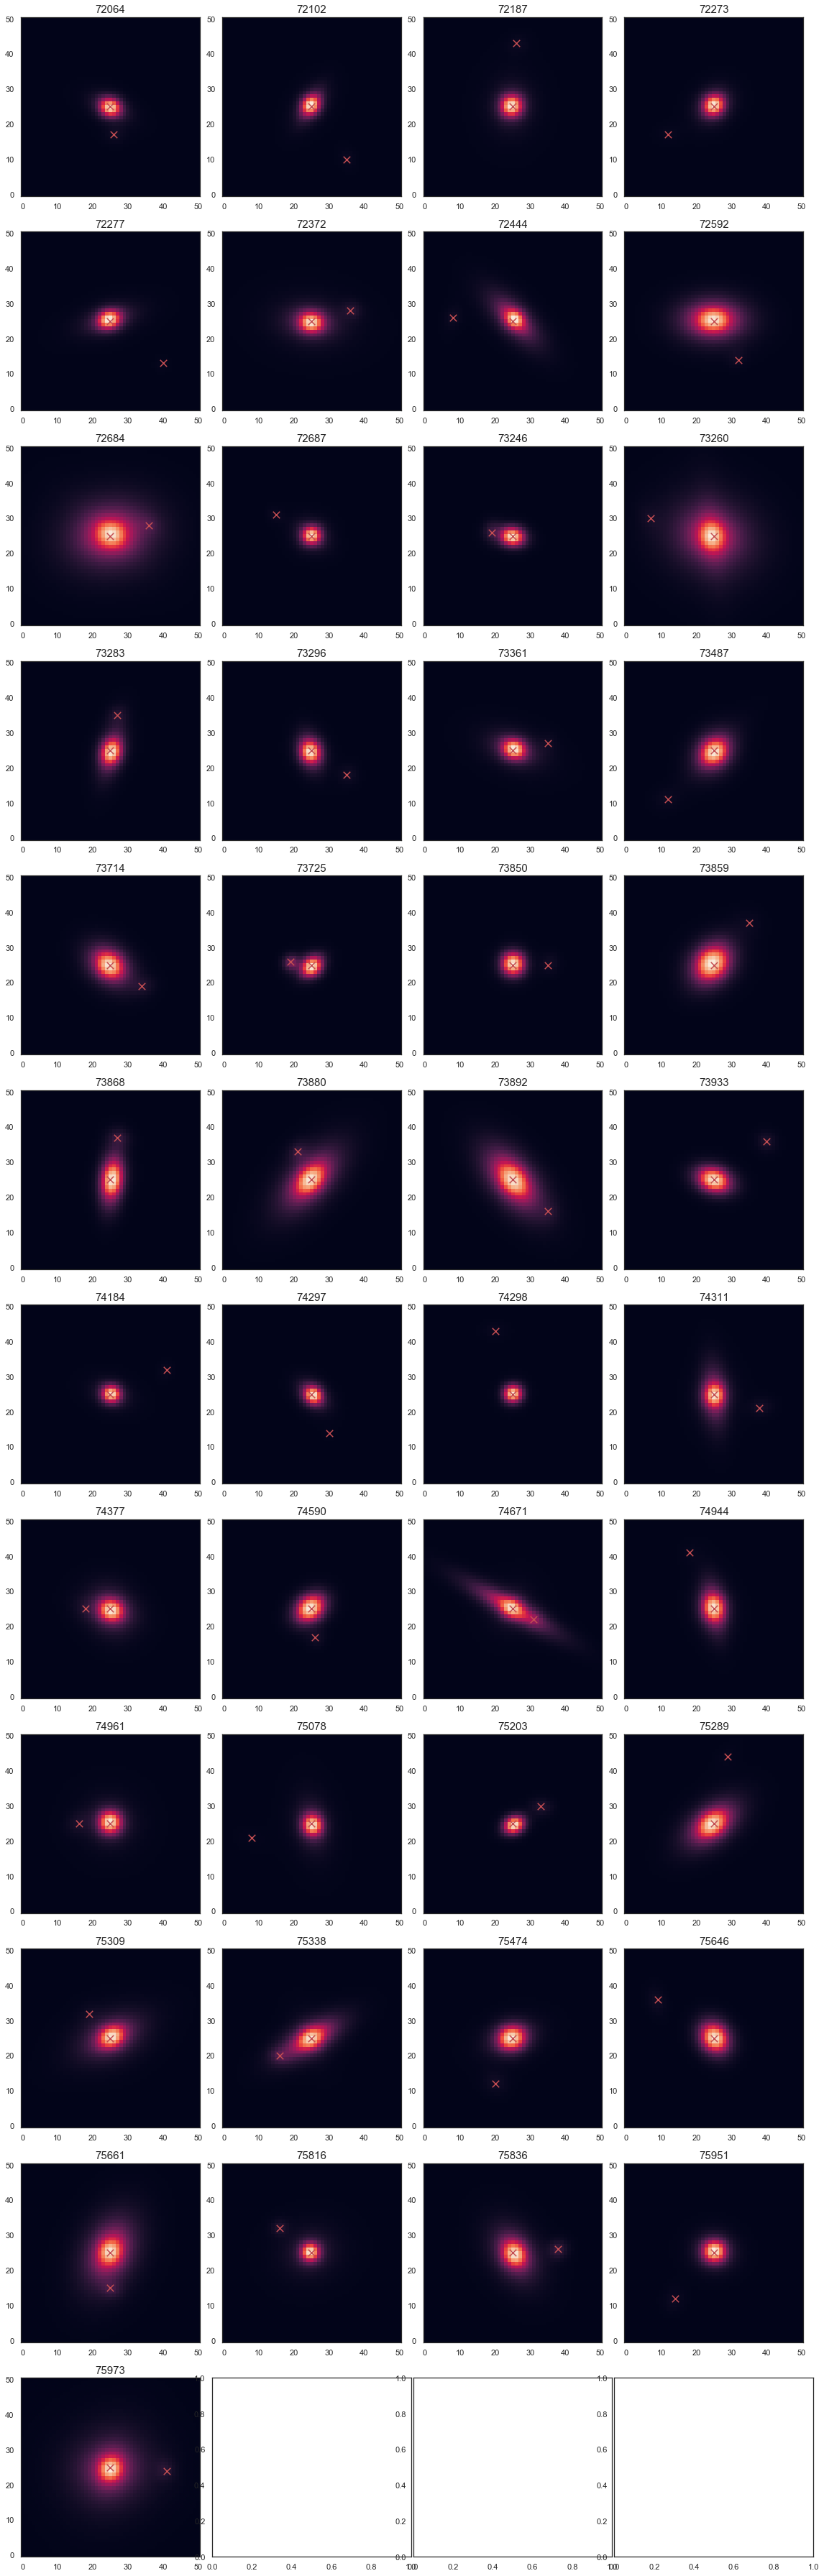

In [6]:
sns.set(context='notebook', style='white', palette='deep')
fig, axs = plt.subplots(12,4, figsize=(20, 65), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .2, wspace=.011)

axs = axs.ravel()
for key in blends_dict:
    for i in range(len(close_objects)):
        if key == str(close_objects.iloc[i , 8]):
            axs[i].imshow(blends_dict[key], origin = 'lower') #display images
            axs[i].scatter(25,25,color='r', marker ='x', s =90) #adding the X mark
            axs[i].scatter(25 + close_objects.iloc[i,5], 25 + close_objects.iloc[i,6], color='r', marker ='x', s =90) #adding the X mark
            axs[i].set_title(key, fontsize=15)
    

plt.show()

## Visualize missed blends on overlapping objects ( $Distance < 6.0$ )

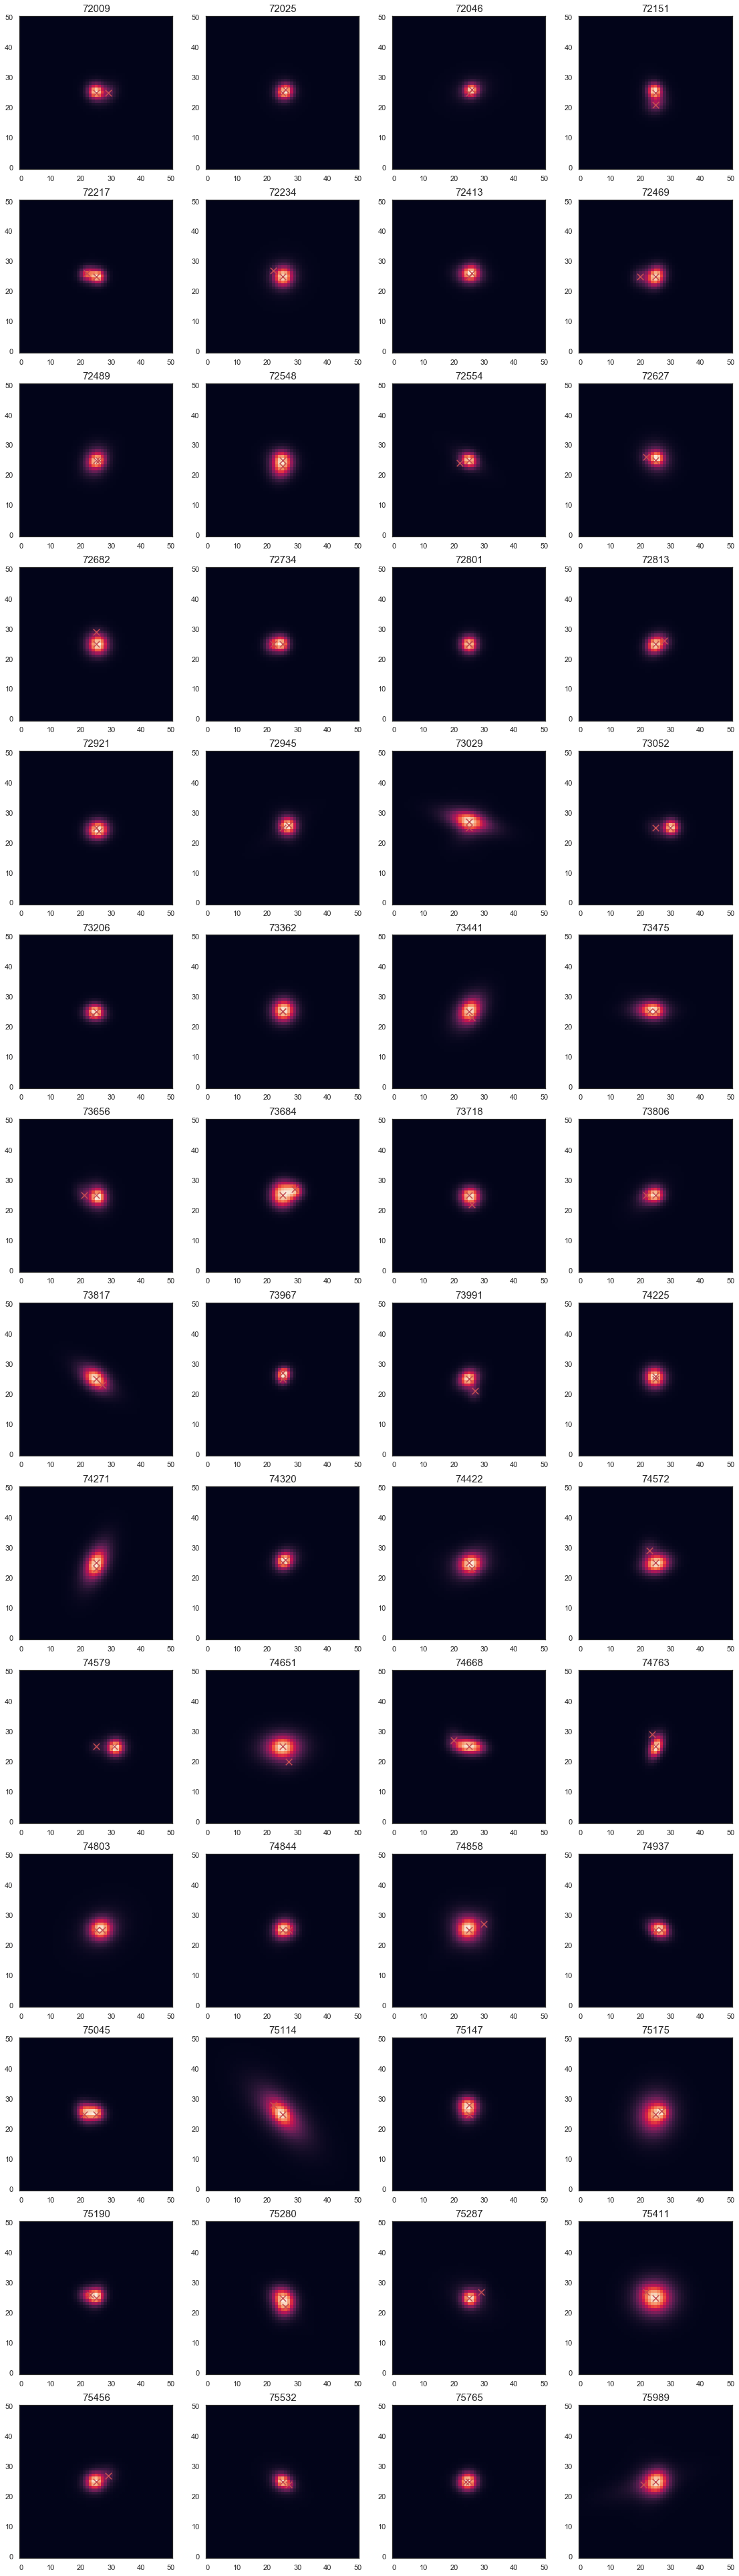

In [7]:
sns.set(context='notebook', style='white', palette='deep')
fig, axs = plt.subplots(14,4, figsize=(20, 70), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .2, wspace=.001)

axs = axs.ravel()
for key in blends_dict:
    for i in range(len(overlaps_objects)):
        if key == str(overlaps_objects.iloc[i , 8]):
            axs[i].imshow(blends_dict[key], origin = 'lower') #display images
            axs[i].scatter(25,25,color='r', marker ='x', s =90) #adding the X mark
            axs[i].scatter(25 + overlaps_objects.iloc[i,5], 25 + overlaps_objects.iloc[i,6], color='r', marker ='x', s =90) #adding the X mark
            axs[i].set_title(key, fontsize=15)
    

plt.show()

## Visualize test images example for presentation

### Blends examples

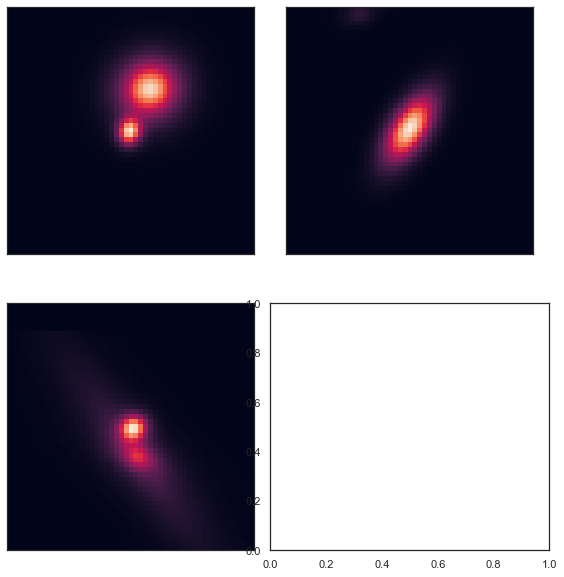

In [29]:
list_blends = [72036, 72348, 72168]

sns.set(context='notebook', style='white', palette='deep')
fig, axs = plt.subplots(2,2, figsize=(10, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .2, wspace=.001)

axs = axs.ravel()
for key in blends_dict:
    for i in range(len(list_blends)):
        if key == str(list_blends[i]):
            axs[i].imshow(blends_dict[key], origin = 'lower') #display images
            #axs[i].scatter(25,25,color='r', marker ='x', s =90) #adding the X mark
            #axs[i].set_title(key, fontsize=15)
            axs[i].set_yticks([])
            axs[i].set_xticks([])


### No blend examples

In [26]:
#Import dict of non blended images
path = "/Users/alacan/Documents/Cosmostat/Codes/BlendHunter/bh/BlendHunterData/test/test/image_"

not_blends_dict = dict()
for i in range(76000, 80000):
    not_blends_dict.update({str(i) : mimage.imread(path + str(i) + ".png")})

print('There are '+str(len(not_blends_dict))+' test images in the dictionary.')

There are 4000 test images in the dictionary.


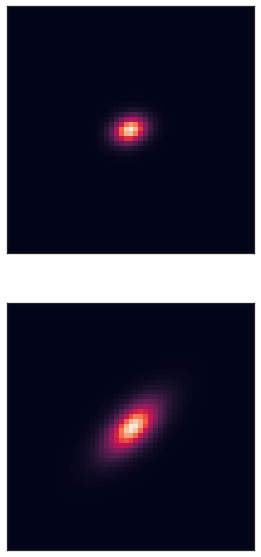

In [28]:
list_no_blends = [79578, 79930]

sns.set(context='notebook', style='white', palette='deep')
fig, axs = plt.subplots(2, figsize=(10, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .2, wspace=.001)

axs = axs.ravel()
for key in not_blends_dict:
    for i in range(len(list_no_blends)):
        if key == str(list_no_blends[i]):
            axs[i].imshow(not_blends_dict[key], origin = 'lower') #display images
            #axs[i].scatter(25,25,color='r', marker ='x', s =90) #adding the X mark
            #axs[i].set_title(key, fontsize=15)
            axs[i].set_yticks([])
            axs[i].set_xticks([])

